In [4]:
from sklearn.model_selection import train_test_split
from metrics import *
import pandas as pd

In [5]:
data = pd.read_csv('../data/gender_classification_v7.csv')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [6]:
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})

In [7]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from gaussian_nb import GaussianNaiveBayes

nb = GaussianNaiveBayes()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)

In [9]:
print(accuracy(y_test, pred))
print(precision(y_test, pred))
print(recall(y_test, pred))
print(f1(y_test, pred))

0.964035964035964
0.9586614173228346
0.9701195219123506
0.9643564356435643


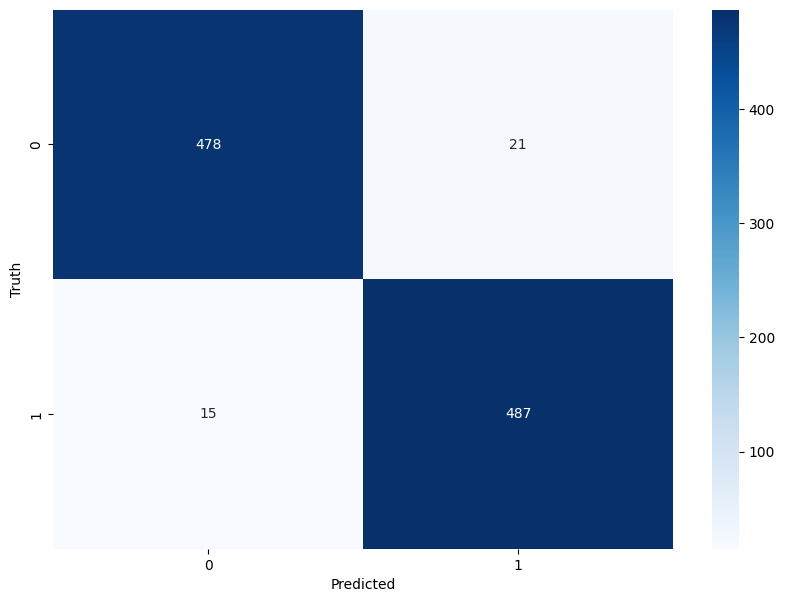

In [10]:
# Vytvorenie confusion matrix a zobrazenie pomocou teplotnej mapy
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()